Retail Sales EDA




INTRODUCTION

In the ever-evolving retail landscape, gaining a nuanced understanding of sales dynamics and consumer behavior is essential for driving business success. This dataset provides a detailed snapshot of a fictional retail environment, capturing critical attributes that influence both retail operations and customer interactions. Specifically, the dataset includes Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, and Total Amount. These attributes offer a rich foundation for exploring sales trends, demographic influences, and purchasing behaviors.

Purpose

The purpose of this data analysis project is to conduct a thorough examination of the dataset to reveal meaningful insights into retail operations and consumer patterns. By analyzing the interplay between transaction details, customer demographics, and product categories, we aim to identify key trends, assess the impact of demographic factors on purchasing behavior, and evaluate sales performance across different product categories. This analysis will enable us to generate actionable recommendations for optimizing inventory management, tailoring marketing strategies, and enhancing overall customer experience. Through this data-driven approach, we seek to empower stakeholders with valuable insights that drive strategic decision-making and improve operational efficiency.

About the dataset

dataset is taken from kaggle - https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset

Importing Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.filterwarnings("ignore")


Data Loading 

In [30]:
dataset=pd.read_csv('retail_sales_dataset.csv')

In [31]:
dataset.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [32]:
dataset.shape

(1000, 9)

There are 9 columns and 1000 rows in this dataset

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


Data Cleaning

In [34]:
dataset.nunique() #checking for unique values

Transaction ID      1000
Date                 345
Customer ID         1000
Gender                 2
Age                   47
Product Category       3
Quantity               4
Price per Unit         5
Total Amount          18
dtype: int64

In [35]:
dataset.drop_duplicates(inplace=True) # dropping duplicates if any
dataset.size

9000

No duplicate values. Lets explore the gender and product category column to check for any spelling mistakes.

In [36]:
dataset['Gender'].unique().tolist()


['Male', 'Female']

In [37]:
dataset['Product Category'].unique().tolist()

['Beauty', 'Clothing', 'Electronics']

There are 3 categories in product category

In [38]:
dataset.isnull().sum() #checking for null values

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [39]:
dataset.dtypes # datatypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

from above we can see that Date column is of object type which needs to be changed to datetime

In [40]:
dataset['Date']=pd.to_datetime(dataset['Date'])
dataset.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

Descriptive Statistics

In [41]:
dataset.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [42]:
dataset[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].mode()

,Age,Quantity,Price per Unit,Total Amount
0,43,4.0,50.0,50.0
1,64,NaN,NaN,NaN


1.The mean age of people who made transactions is 41 and median is 42 and the mode is 43 and 64 indicating people aged 43 and 64 have purchase frequently. 
2. purchases are made by people aged between 18 and 64. and 75% are below 53.
3. price for per item ranges between 50 to 500 and maximum 2000 total amount.

Exploratory Data Analysis


Following set of questions to ask the data for deriving insights.
1)What are the key sales metrics we should track over time?
2)How do sales figures fluctuate across different months of the year?Are there any noticeable patterns or trends in the sales data?
                                    

1)What are the key sales metrics we should track over time?

In [43]:
total_sales_revenue = dataset['Total Amount'].sum()
print("Total Sales Revenue Over Time:")
print(total_sales_revenue)
total_transactions=dataset['Transaction ID'].count()
print("\nTotal number of transactions:")
print(total_transactions)
total_units_sold=dataset['Quantity'].sum()
print("\nTotal Units Sold:")
print(total_units_sold)
avg_transaction_value = total_sales_revenue/total_transactions
print("\nAverage Transaction Value Over Time:")
print(avg_transaction_value)
Average_Quantity_per_Transaction = total_units_sold/total_transactions
print("\nAverage Quantity per Transaction:")
print(Average_Quantity_per_Transaction)
sales_by_category = dataset.groupby('Product Category').agg({'Total Amount': 'sum'}).reset_index()
print("\nTotal revenue per category:")
print(sales_by_category)

Total Sales Revenue Over Time:
456000

Total number of transactions:
1000

Total Units Sold:
2514

Average Transaction Value Over Time:
456.0

Average Quantity per Transaction:
2.514

Total revenue per category:
  Product Category  Total Amount
0           Beauty        143515
1         Clothing        155580
2      Electronics        156905


Time Series Analysis
2)How do sales figures fluctuate across different months of the year?

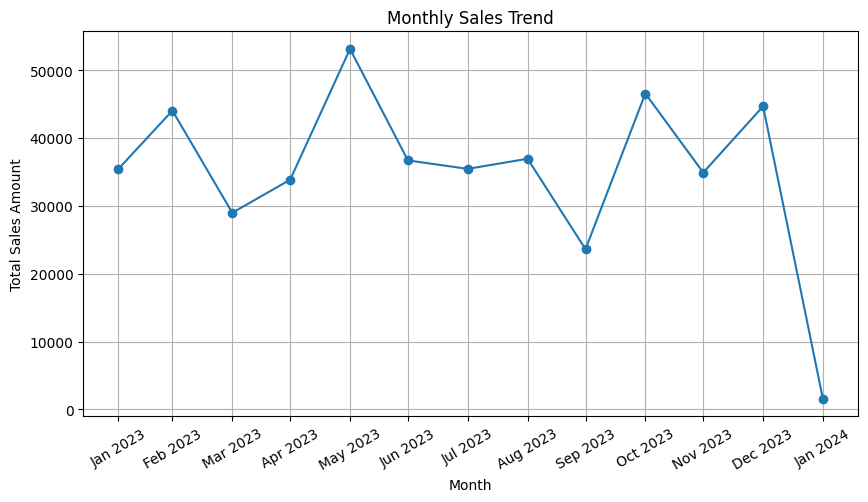

In [44]:
monthly_sales = dataset.resample('ME', on='Date')['Total Amount'].sum()
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(ticks=monthly_sales.index, labels=[month.strftime('%b %Y') for month in monthly_sales.index], rotation=30)
plt.grid(True)
plt.show()

1)From the above graph we can see that revenue growth was notably recorded  in February, May, October, and December, with the remaining months experienced decline.


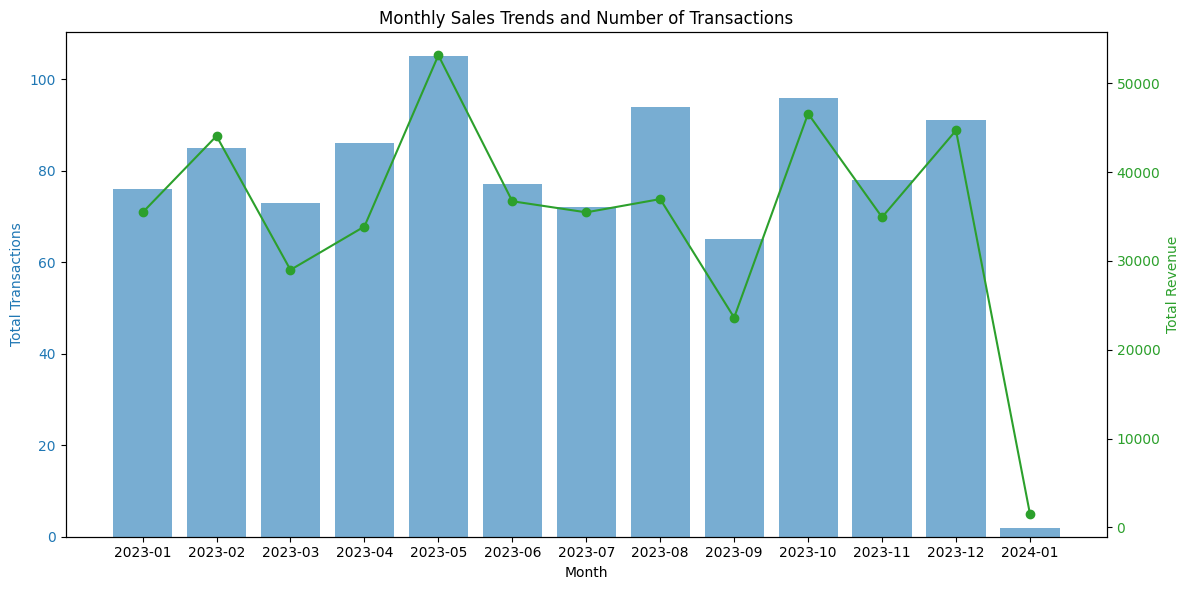

In [45]:

# Extract month and year from 'Date'
dataset['YearMonth'] = dataset['Date'].dt.to_period('M')

# Calculate total number of transactions per month
transactions_per_month = dataset['YearMonth'].value_counts().sort_index()

# Calculate total revenue per month
revenue_per_month = dataset.groupby('YearMonth')['Total Amount'].sum().sort_index()

# Combine results into a single DataFrame for plotting
result_df = pd.DataFrame({
    'Total Revenue': revenue_per_month,
    'Total Transactions': transactions_per_month
})

# Convert YearMonth to a readable format for plotting
result_df.index = result_df.index.astype(str)



# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Total Transactions as columns
color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Total Transactions', color=color)
ax1.bar(result_df.index, result_df['Total Transactions'], color=color, alpha=0.6, label='Total Transactions')
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis to plot Total Revenue as a line
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Total Revenue', color=color)
ax2.plot(result_df.index, result_df['Total Revenue'], color=color, marker='o', label='Total Revenue')
ax2.tick_params(axis='y', labelcolor=color)

# Add titles and legends
plt.title('Monthly Sales Trends and Number of Transactions')
fig.tight_layout()
plt.show()

In [46]:
dataset['YearMonth'] = dataset['Date'].dt.to_period('M')

# Calculate total number of transactions per month
transactions_per_month = dataset['YearMonth'].value_counts().sort_index()

# Calculate total revenue per month
revenue_per_month = dataset.groupby('YearMonth')['Total Amount'].sum().sort_index()

result_df = pd.DataFrame({
    'Total Number of Transactions': transactions_per_month,
    'Total Revenue': revenue_per_month
})
# Reset index to use YearMonth as a column for sorting
result_df = result_df.reset_index()
result_df.rename(columns={'index': 'YearMonth'}, inplace=True)

# Sort by total revenue in descending order
result_df = result_df.sort_values(by='Total Revenue', ascending=False)

# Convert YearMonth period to a readable month name
result_df['YearMonth'] = result_df['YearMonth'].dt.strftime('%B %Y')

# Print results sorted by revenue
print(result_df)

         YearMonth  Total Number of Transactions  Total Revenue
4         May 2023                           105          53150
9     October 2023                            96          46580
11   December 2023                            91          44690
1    February 2023                            85          44060
7      August 2023                            94          36960
5        June 2023                            77          36715
6        July 2023                            72          35465
0     January 2023                            76          35450
10   November 2023                            78          34920
3       April 2023                            86          33870
2       March 2023                            73          28990
8   September 2023                            65          23620
12    January 2024                             2           1530


from the above graph and data its seen that total number of transactions during the month of march,april and august does not align with total revenue. it can be due to purchases made by customers during those months are low rate products.

The key points of discussion are the significant revenue spike in May and the noticeable revenue drop in September.
Let's analyze the underlying factors contributing to these fluctuations to understand their impact on overall performance.

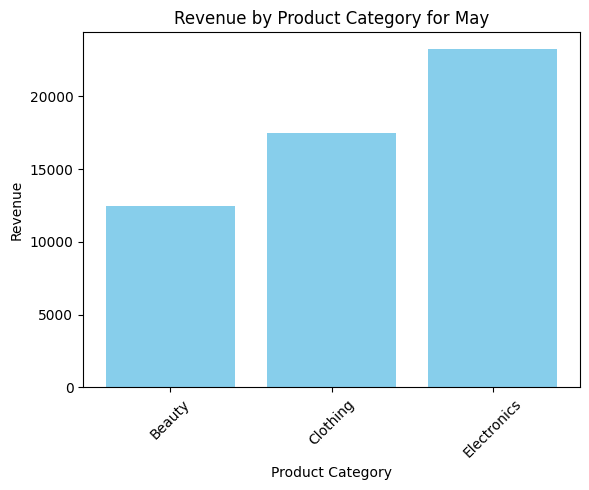

In [47]:
dt_may = dataset[dataset['Date'].dt.month == 5]

# Group by 'Product Category' and sum 'Total Amount'
revenue_by_category = dt_may.groupby('Product Category')['Total Amount'].sum().reset_index()

# Plotting
plt.figure(figsize=(6, 5))
plt.bar(revenue_by_category['Product Category'], revenue_by_category['Total Amount'], color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.title('Revenue by Product Category for May')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The Electronics section in the product category has generated substantial revenue, likely attributable to the summer sales period, which typically drives a higher purchase rate. 

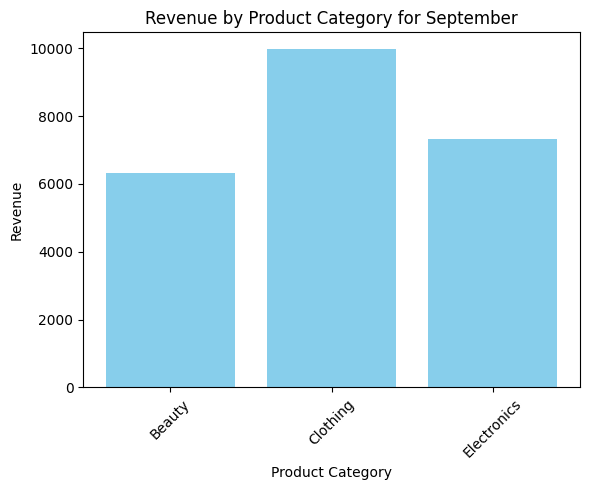

In [48]:
dt_sep = dataset[dataset['Date'].dt.month == 9]

# Group by 'Product Category' and sum 'Total Amount'
revenue_by_category = dt_sep.groupby('Product Category')['Total Amount'].sum().reset_index()

# Plotting
plt.figure(figsize=(6, 5))
plt.bar(revenue_by_category['Product Category'], revenue_by_category['Total Amount'], color='skyblue')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.title('Revenue by Product Category for September')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

fall of revenue for electronics and beauty product categories with total number of transaction only 65 and revenue generated is $23620 for the month of september.

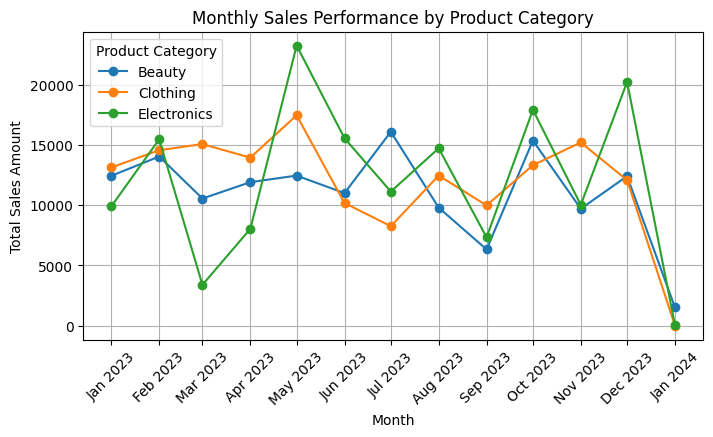

In [49]:
category_sales = dataset.groupby([dataset['Date'].dt.to_period('M'), 'Product Category'])['Total Amount'].sum().reset_index()

newtable = category_sales.pivot(index='Date', columns='Product Category', values='Total Amount').fillna(0)

plt.figure(figsize=(8, 4))
for category in newtable.columns:
    plt.plot(newtable.index.to_timestamp(), newtable[category], marker='o', label=category)  # Convert index to timestamp for better plotting

plt.title('Monthly Sales Performance by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.legend(title='Product Category')
plt.grid(True)
plt.xticks(ticks=newtable.index.to_timestamp(), labels=[date.strftime('%b %Y') for date in newtable.index.to_timestamp()], rotation=45)  # Convert index to timestamp and format the labels
plt.show()

*In May 2023, two out of three product categories saw strong sales, whereas in September 2023, all categories underperformed, with Beauty hitting 
an all-time low, indicating a potential issue impacting sales during that month.
*There is limited data available, which restricts our ability to conduct a comprehensive analysis of the decline in sales.
*From the above observation its seen that Electronics experienced a sales dip in March 2023 but surged to its highest level in May 2023, 
while Clothing peaked in May 2023 before declining in July 2023.

3)what is the distribution of Sales by Product Category

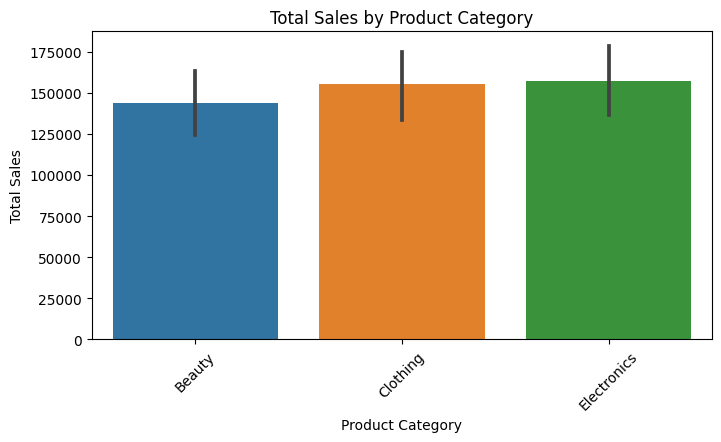

In [50]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Product Category', y='Total Amount', data=dataset, estimator=sum)
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

The Electronics and Clothing product categories have generated the highest revenue, indicating strong performance in these segments

4)How does revenue vary across genders?

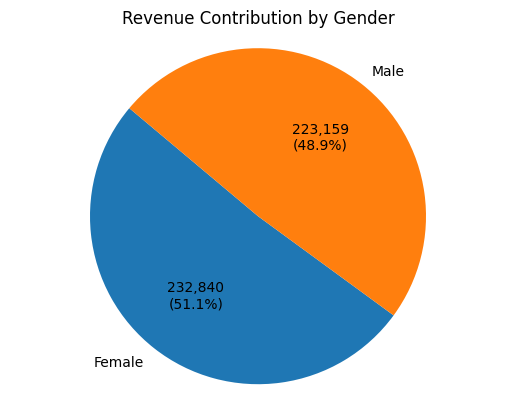

In [51]:
revenue_by_gender = dataset.groupby('Gender')['Total Amount'].sum()

# Define a function to format the labels
def func(pct, all_vals):
    absolute = int(pct / 100.*sum(all_vals))
    return f'{absolute:,}\n({pct:.1f}%)'

# Plot pie chart
labels = revenue_by_gender.index
sizes = revenue_by_gender.values


fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct=lambda pct: func(pct, sizes), startangle=140)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Revenue Contribution by Gender')
plt.show()

The revenue contribution by gender shows that females contributed nearly 2% more than males.

5)What is the distribution of customers' ages, and how does it impact sales patterns?

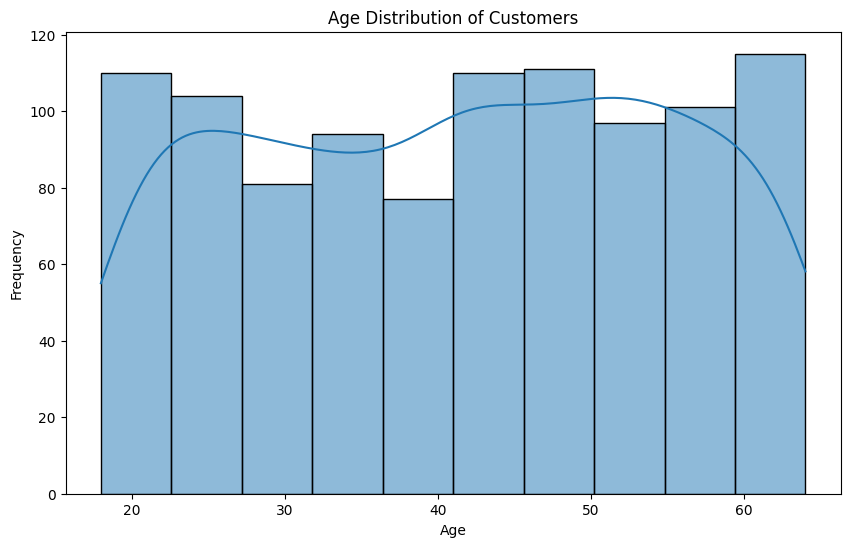

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Age'], bins=10, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



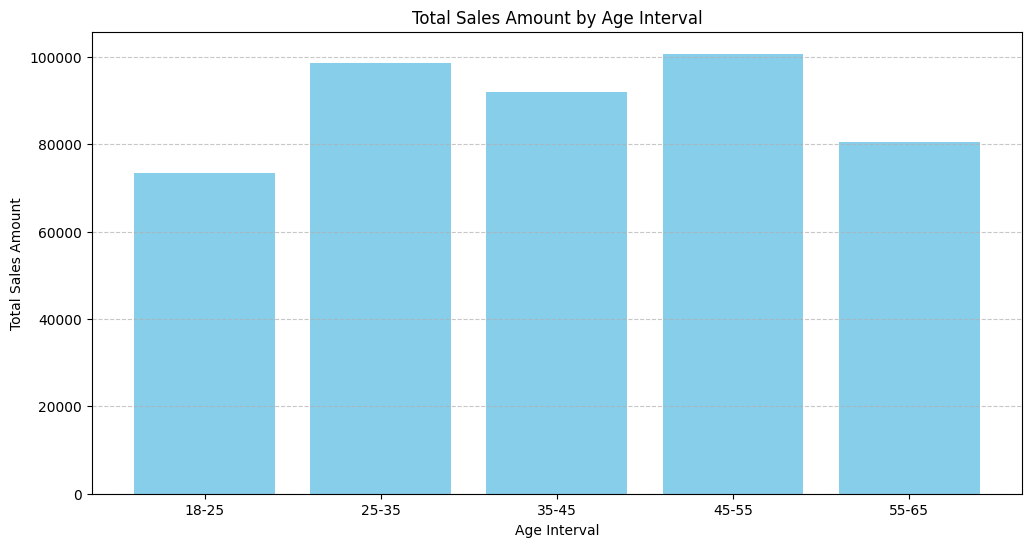

In [53]:
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '25-35', '35-45', '45-55', '55-65']

# Create an 'Age Bin' column based on the defined bins
dataset['Age Bin'] = pd.cut(dataset['Age'], bins=bins, labels=labels)

# Aggregate total sales by age bin
age_bin_sales = dataset.groupby('Age Bin')['Total Amount'].sum().reset_index()

# Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(age_bin_sales['Age Bin'], age_bin_sales['Total Amount'], color='skyblue')
plt.xlabel('Age Interval')
plt.ylabel('Total Sales Amount')
plt.title('Total Sales Amount by Age Interval')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

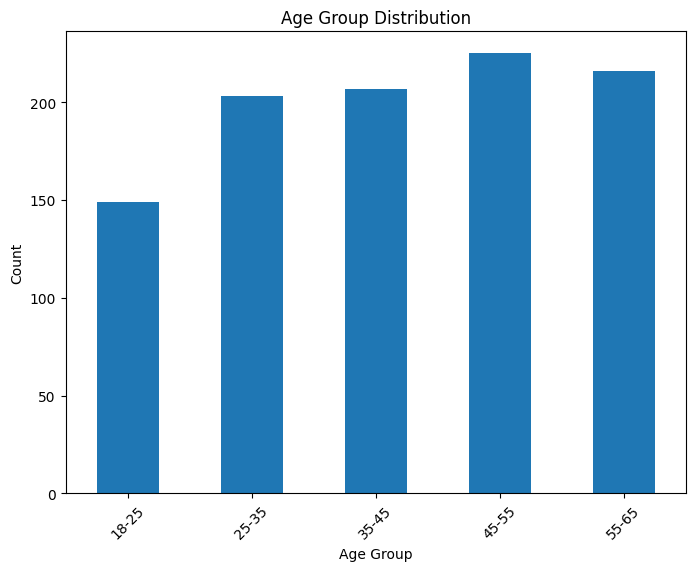

In [54]:
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '25-35', '35-45', '45-55', '55-65']

dataset['Age Group'] = pd.cut(dataset['Age'], bins=bins, labels=labels, right=False)

age_distribution = dataset['Age Group'].value_counts().sort_index()

age_distribution.plot(kind='bar', figsize=(8, 6), title='Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The graph reveals that the majority of shoppers fall within the 45-55 age group, whereas the 18-25 age group has the fewest shoppers.

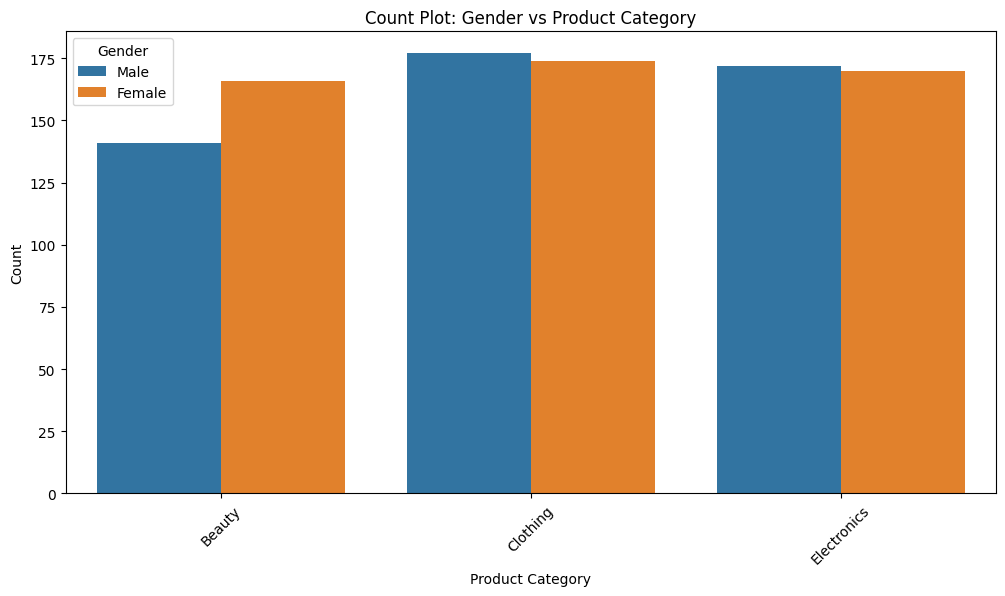

In [55]:
# Count Plot: Count of Gender and Product Category
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, x='Product Category', hue='Gender')
plt.title('Count Plot: Gender vs Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

Males purchase clothing products more frequently than females, while females buy beauty products more often than males.

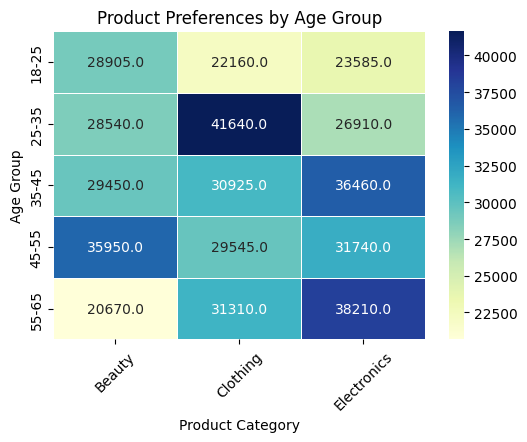

In [56]:

age_group_product_sales = dataset.groupby(['Age Group', 'Product Category'])['Total Amount'].sum().unstack()

plt.figure(figsize=(6, 4))
sns.heatmap(age_group_product_sales, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('Product Preferences by Age Group')
plt.xlabel('Product Category')
plt.ylabel('Age Group')
plt.xticks(rotation=45)
plt.show()

Recommendations

1)The shop should focus on customers aged 25-55, with specific subsegments for targeted marketing. For the 25-35 age group, prioritize Clothing products,
which generate notably higher revenue in this category. For the 35-55 age group, target all product categories since revenue differences between them are
minimal.Consider a targeted marketing campaign for all product categories aimed at the emerging 45-54 age group, aligning with the overall 
business strategy.
2)Given that females frequently purchase Beauty products but spend less per transaction, the shop should introduce higher-value Beauty items to increase
revenue from female customers. This strategy aims to capitalize on their buying frequency by offering premium options.
3)The trend shows a decline in Clothing sales, necessitating strategic action to reverse this trend. Additionally, the sales dip in September requires
thorough investigation and appropriate measures to address the issue.
4)May is the peak sales period, with Electronics leading. To maximize revenue during this time, explore additional marketingopportunities for Electronics
and follow up with Clothing products.
5)These customers represent potential churn risks and should be targeted with personalized marketing strategies tailored to their preferred product 
categories.